<a href="https://colab.research.google.com/github/MissTife/sync-internship/blob/main/notebooksign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the needed libraries needed for the model.

In [ ]:
pip install keras-tuner

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras_tuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import accuracy_score,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
from google.colab.patches import cv2_imshow



<ipython-input-2-f10059129e75>:11: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.engine.hyperparameters import HyperParameters


Assign the dataset to both the train and test data.Use the pandas library to read the data.

In [ ]:

train = pd.read_csv('/content/sign_mnist_train.csv')
test =pd.read_csv('/content/sign_mnist_test.csv')



In [ ]:
train.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118   127.0   134.0   139.0   143.0   146.0   150.0   
1      6     155     157   156.0   156.0   156.0   157.0   156.0   158.0   
2      2     187     188   188.0   187.0   187.0   186.0   187.0   188.0   
3      2     211     211   212.0   212.0   211.0   210.0   211.0   210.0   
4     13     164     167   170.0   172.0   176.0   179.0   180.0   184.0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0   153.0  ...     207.0     207.0     207.0     207.0     206.0     206.0   
1   158.0  ...      69.0     149.0     128.0      87.0      94.0     163.0   
2   187.0  ...     202.0     201.0     200.0     199.0     198.0     199.0   
3   210.0  ...     235.0     234.0     233.0     231.0     230.0     226.0   
4   185.0  ...      92.0     105.0     105.0     108.0     133.0     163.0   

   pixel781  pixel782  pixel783  pixel784  
0     206.0     204.0     203.0     202.0  
1     175.0     103.0     135.0     149.0  
2     198.0     195.0     194.0     195.0  
3     225.0     222.0     229.0     163.0  
4     157.0     163.0     164.0     179.0  

[5 rows x 785 columns]

In [ ]:
test.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      6     149     149     150     150     150     151     151     150   
1      5     126     128     131     132     133     134     135     135   
2     10      85      88      92      96     105     123     135     143   
3      0     203     205     207     206     207     209     210     209   
4      3     188     191     193     195     199     201     202     203   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     151  ...     138.0     148.0     127.0      89.0      82.0      96.0   
1     136  ...      47.0     104.0     194.0     183.0     186.0     184.0   
2     147  ...      68.0     166.0     242.0     227.0     230.0     227.0   
3     210  ...     154.0     248.0     247.0     248.0     253.0     236.0   
4     203  ...      26.0      40.0      64.0      48.0      29.0      46.0   

   pixel781  pixel782  pixel783  pixel784  
0     106.0     112.0     120.0     107.0  
1     184.0     184.0     182.0     180.0  
2     226.0     225.0     224.0     222.0  
3     230.0     240.0     253.0     255.0  
4      49.0      46.0      46.0      53.0  

[5 rows x 785 columns]

In [ ]:
y_train = train['label']
y_test = test['label']
del train['label']
del test['label']

In [ ]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [ ]:
x_train = train.values
x_test = test.values

In [ ]:
train_data = np.array(train, dtype='float32')
test_data = np.array(test, dtype='float32')

In [ ]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M',
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
len(class_names)

24

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [ ]:
# Reshape the data for CNN
X_train = X_train.reshape(-1, 28, 28, 1)  # Assuming your images are 28x28 grayscale
X_val = X_val.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(class_names), activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
605/605 [==============================] - 42s 68ms/step - loss: 1.3451 - accuracy: 0.8014 - val_loss: nan - val_accuracy: 0.9957
Epoch 2/10
605/605 [==============================] - 22s 37ms/step - loss: 0.0095 - accuracy: 0.9982 - val_loss: nan - val_accuracy: 0.9897
Epoch 3/10
605/605 [==============================] - 22s 36ms/step - loss: 0.0714 - accuracy: 0.9777 - val_loss: nan - val_accuracy: 0.9992
Epoch 4/10
605/605 [==============================] - 21s 35ms/step - loss: 0.0132 - accuracy: 0.9963 - val_loss: nan - val_accuracy: 0.9738
Epoch 5/10
605/605 [==============================] - 23s 39ms/step - loss: 0.0205 - accuracy: 0.9945 - val_loss: nan - val_accuracy: 0.9998
Epoch 6/10
605/605 [==============================] - 25s 42ms/step - loss: 6.2997e-05 - accuracy: 1.0000 - val_loss: nan - val_accuracy: 0.9998
Epoch 7/10
605/605 [==============================] - 22s 36ms/step - loss: 2.4566e-05 - accuracy: 1.0000 - val_loss: nan - val_accuracy: 0.9998
Epoch

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

119/119 [==============================] - 1s 9ms/step - loss: nan - accuracy: 0.9115
Test accuracy: 0.9114857912063599


In [48]:
# Make predictions on the test set
predictions = model.predict(x_test)
predicted_labels = [class_names[np.argmax(pred)] for pred in predictions]
print("Predicted labels for the test set:", predicted_labels)

119/119 [==============================] - 1s 9ms/step
Predicted labels for the test set: ['G', 'F', 'K', 'A', 'D', 'V', 'K', 'O', 'D', 'H', 'I', 'I', 'V', 'M', 'H', 'E', 'W', 'A', 'H', 'H', 'C', 'A', 'V', 'E', 'K', 'P', 'C', 'P', 'H', 'B', 'H', 'I', 'N', 'T', 'D', 'V', 'N', 'D', 'S', 'O', 'P', 'X', 'I', 'P', 'O', 'F', 'R', 'E', 'T', 'N', 'U', 'W', 'D', 'F', 'Q', 'Q', 'V', 'E', 'G', 'W', 'K', 'N', 'L', 'W', 'C', 'K', 'B', 'E', 'S', 'E', 'U', 'G', 'P', 'E', 'D', 'U', 'P', 'L', 'C', 'C', 'R', 'C', 'H', 'V', 'X', 'H', 'M', 'V', 'I', 'E', 'C', 'B', 'H', 'T', 'I', 'F', 'A', 'A', 'T', 'V', 'I', 'E', 'C', 'U', 'Q', 'B', 'P', 'E', 'C', 'G', 'M', 'F', 'A', 'Y', 'C', 'T', 'X', 'Y', 'Q', 'V', 'E', 'I', 'I', 'M', 'M', 'I', 'G', 'V', 'E', 'P', 'L', 'V', 'C', 'P', 'X', 'X', 'E', 'V', 'W', 'D', 'P', 'S', 'H', 'R', 'V', 'G', 'B', 'G', 'K', 'F', 'E', 'V', 'D', 'V', 'E', 'X', 'C', 'K', 'H', 'F', 'O', 'V', 'I', 'E', 'S', 'X', 'N', 'D', 'G', 'I', 'M', 'P', 'E', 'Q', 'D', 'R', 'S', 'P', 'V', 'B', 'N', 'Q',

In [ ]:
model.save('sign_model.h5')

In [39]:
from PIL import Image

# Path to the image you want to display
image_path = '/content/amer_sign2.png'

# Open the image
img = Image.open(image_path)

# Display the image
img.show()


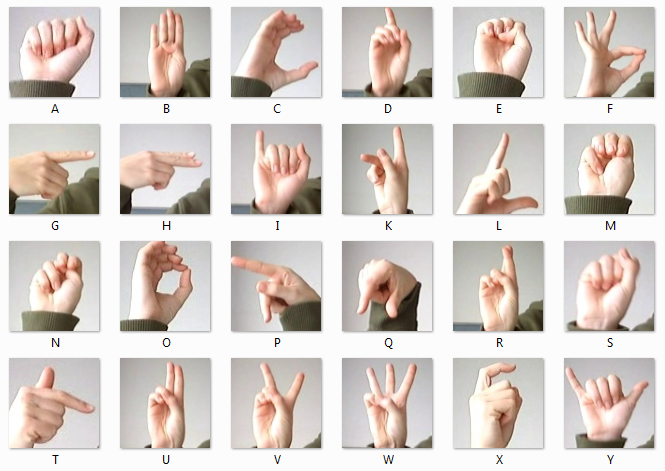

In [40]:
img


1/1 [==============================] - 0s 83ms/step


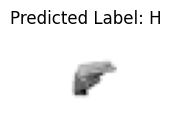

In [54]:

import matplotlib.pyplot as plt

# Load the saved model
saved_model_path = '/content/sign_model.h5'  # Replace with the path to your saved model
loaded_model = tf.keras.models.load_model(saved_model_path)

# Function to preprocess a single image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.convert('L')  # Convert to grayscale
    image = image.resize((28, 28))  # Resize to match the model's input size
    image = np.array(image)  # Convert to numpy array
    image = image / 255.0  # Normalize pixel values
    image = image.reshape(-1, 28, 28, 1)  # Reshape to match the model's input shape
    return image

# Function to display the image and predicted label
def show_image_and_prediction(image, predicted_label):
    plt.figure(figsize=(1, 2))  # Adjust the figure size
    plt.imshow(image[0, :, :, 0], cmap='gray')
    plt.title("Predicted Label: " + predicted_label)
    plt.axis('off')
    plt.show()
# Path to the new image you want to predict
new_image_path = '/content/E29BF095-7609-42EA-BCF4-A2BED59ED185.png'

# Preprocess the new image
preprocessed_image = preprocess_image(new_image_path)

# Make predictions using the loaded model
predictions = loaded_model.predict(preprocessed_image)

# Assuming you have class_names defined as in the previous code
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M',
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

# Get the predicted class label
predicted_label = class_names[np.argmax(predictions[0])]

# Show the image and predicted label
show_image_and_prediction(preprocessed_image, predicted_label)
